In [1]:
import torch
import numpy as np
import pandas
import gzip
from matplotlib import pyplot as plt

# Reading the MNIST dataset
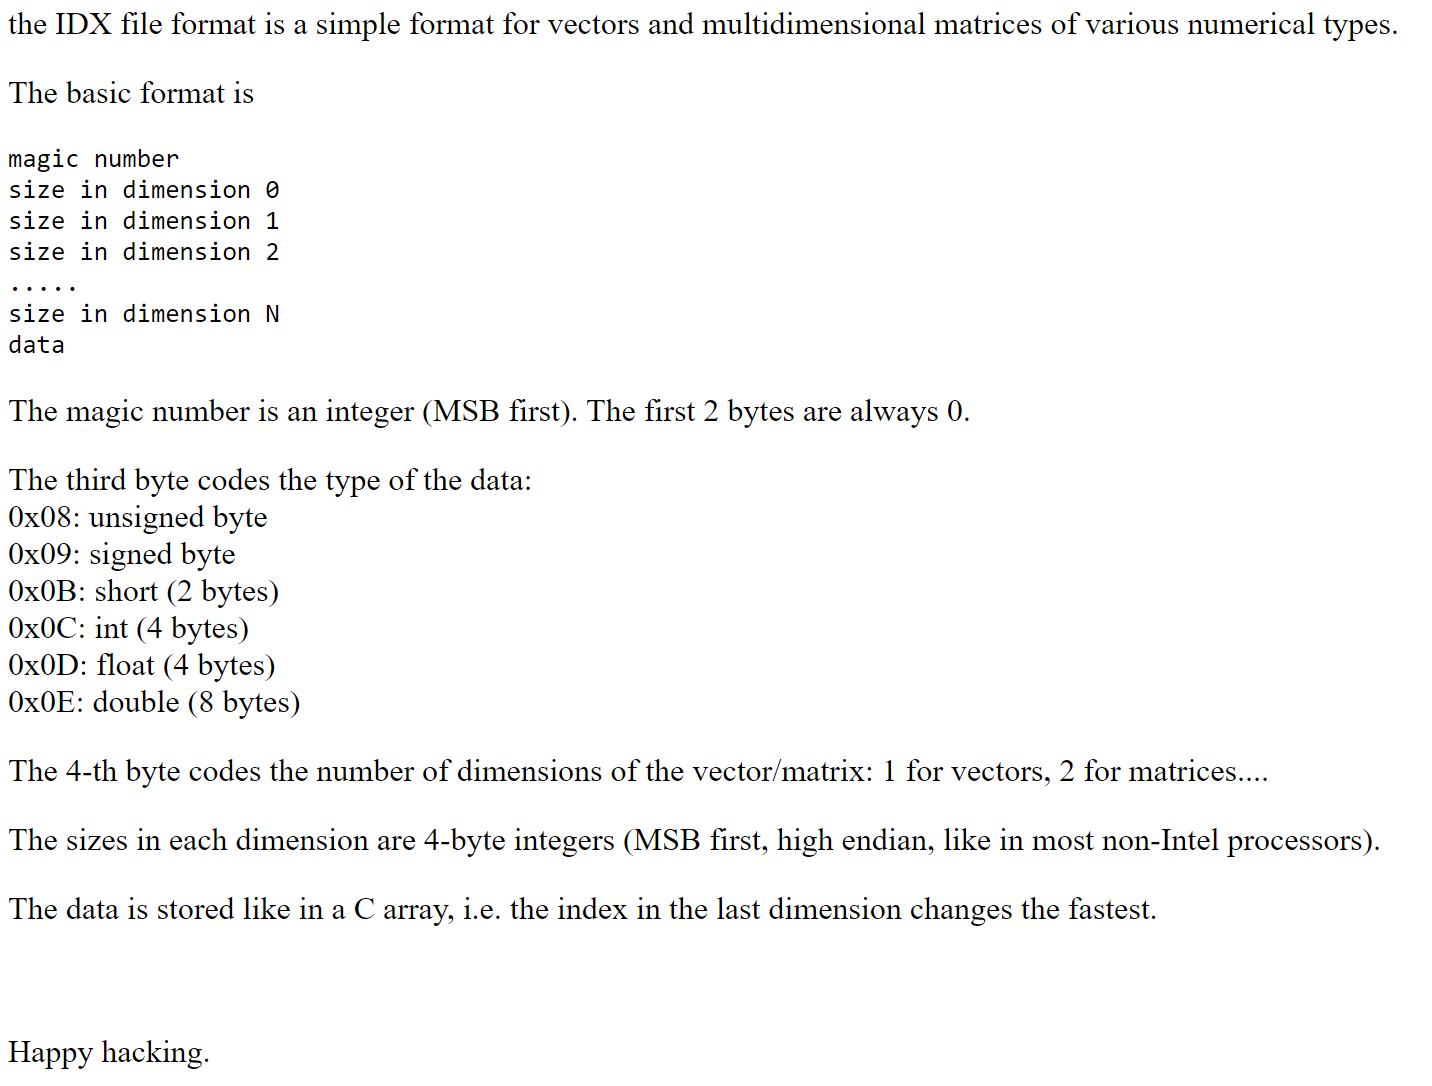

In [2]:
def bytes_to_uint(byts):
    mul=1
    #assume it's a signed int
    out=0
    for b in byts[::-1]:
        out+=b*mul
        mul*=2**8
    return out
    

# Making a function to read in the data

I wonder if there is a function in pandas that would have done this. 

I think perhaps not though

In [3]:
ddict={b'\x08\n'[0]:'uint8',b'\x09\n'[0]:'int8',b'\x0B\n'[0]:'int16',b'\x0C\n'[0]:'int32',b'\x0D\n'[0]:'float32',b'\x0E\n'[0]:'float64'}

def bytefile2array(fname):
    with gzip.open(fname,'rb') as fil:
        byteset=next(fil)
        #verify the first two bytes are zero
        print(byteset[0],byteset[1])
        #verify the datatype is uint8
        dtype=byteset[2]
        dim=byteset[3]
        #figure out the dtype
        print(ddict[dtype],dim)
        i=4
        dims=[]
        #figure out the dimensions
        for x in range(dim):
            dims+=[byteset[i:i+4]]
            i+=4
        arrdims=[bytes_to_uint(size) for size in dims]
        print(arrdims)
        arr = np.zeros(np.prod(arrdims),dtype=ddict[dtype])
        #assumes it's a uint8 because I don't want to make a general dtype conversion function
        #variable i is already set to the index to the first byte of data
        for num in range(np.prod(arrdims)):
            if i==len(byteset):
                byteset=next(fil)
                i=0
            arr[num]=byteset[i]
            i+=1
        arr=arr.reshape(arrdims)
    return arr

0 0
uint8 3
[60000, 28, 28]


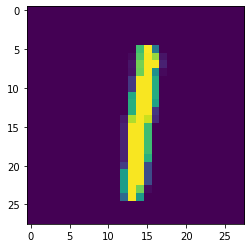

0 0
uint8 1
[60000]
1


In [4]:
trainfile="mnist/train-images-idx3-ubyte.gz"

traindata=bytefile2array(trainfile)

plt.imshow(traindata[40])
plt.show()

trainlabels=bytefile2array("mnist/train-labels-idx1-ubyte.gz")
print(trainlabels[40])


In [5]:
np.save("mnist/TRAIN-IMG",traindata)
np.save("mnist/TRAIN-LABEL",trainlabels)

In [6]:
testdata=bytefile2array("mnist/t10k-images-idx3-ubyte.gz")
testlabels=bytefile2array("mnist/t10k-labels-idx1-ubyte.gz")
np.save("mnist/TEST-IMG",testdata)
np.save("mnist/TEST-LABEL",testlabels)

0 0
uint8 3
[10000, 28, 28]
0 0
uint8 1
[10000]


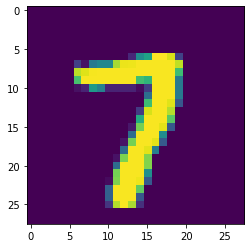

0 0
uint8 1
[60000]
7


In [7]:
plt.imshow(testdata[-10])
plt.show()

trainlabels=bytefile2array("mnist/train-labels-idx1-ubyte.gz")
print(testlabels[-10])

# Sonar Dataset

In [8]:
data = pandas.read_csv("sonar/sonar.all-data")
print(data.shape)
print(data.keys())
print(data['R'][::20])
data.head()


(207, 61)
Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')
0      R
20     R
40     R
60     R
80     R
100    M
120    M
140    M
160    M
180    M
200    M
Name: R, dtype: object


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


# Columns are unlabeled and data is interpereted row wise, so we can iterate over rows and take a look at what a rock vs a bomb looks like

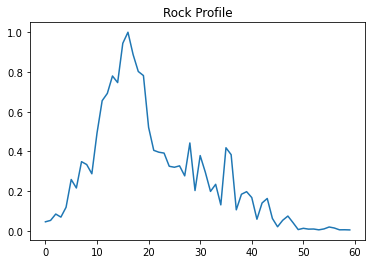

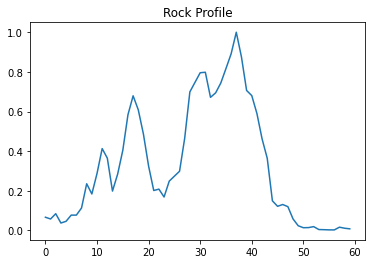

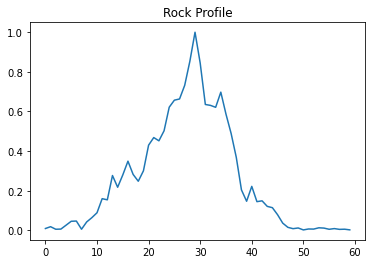

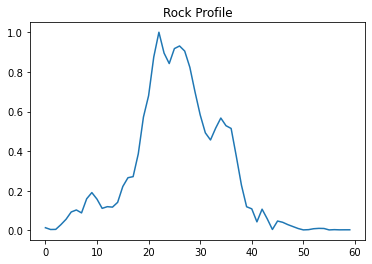

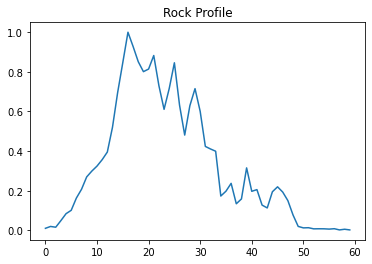

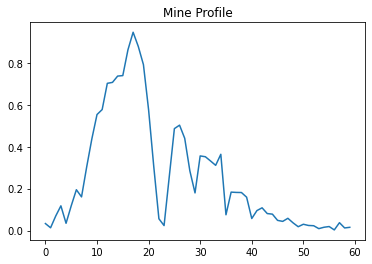

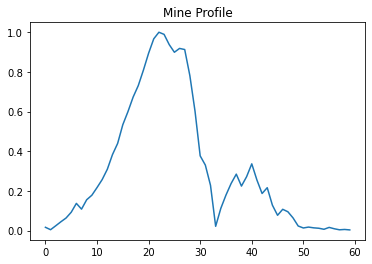

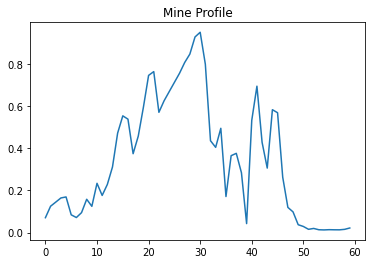

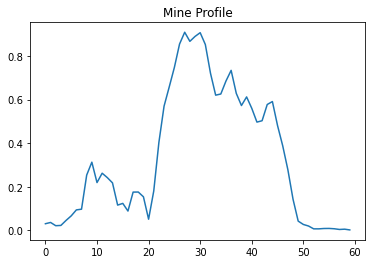

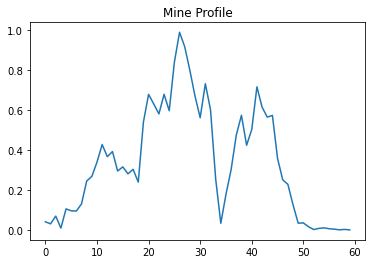

In [9]:
titles = {'R':"Rock Profile","M":'Mine Profile'}

#get the csv rows
a = data.iterrows()

row=next(a)
for x in range(10):
    #look at the the data and give it a label
    plt.plot(np.arange(60),row[1][:-1])
    plt.title(titles[row[1][-1]])
    plt.show()

    for x in range(20):
        row=next(a)


# Reformat and Save

Will be setting Rocks to 0 and Mines to 1

In [10]:
labeldict = {'R':0,"M":1}
#get the csv rows
a = data.iterrows()

alldata=np.zeros([207,60],dtype=np.float32)

alllabels=np.zeros(207)

for i in range(data.shape[0]):
    row=next(a)
    alldata[i]=row[1][:-1]
    alllabels[i] = labeldict[row[1][-1]]

In [11]:
np.save("Sonar/data",alldata)
np.save("Sonar/label",alllabels)

In [2]:
from pydub import AudioSegment
import mido
i=1
plt.rcParams["figure.figsize"]=[15,4]

In [3]:

with open('music/onsets.txt') as onsets:
    for x in range(i):
        line=onsets.readline()
onset=float(line.split()[-1])
print(onset)
name=line.split()[1]
print(name)


2.549
Bach_BWV849-01_001_20090916-SMD


# Taking a look at traindata

(31859636,)
48000 2


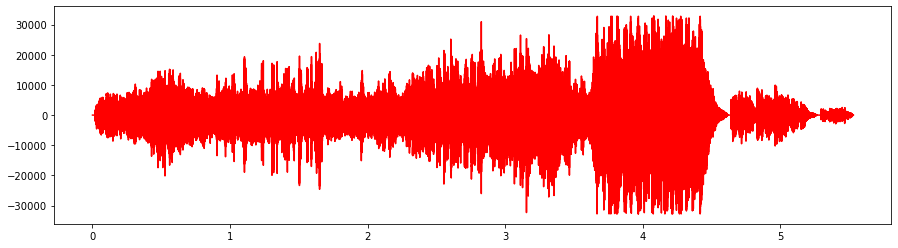

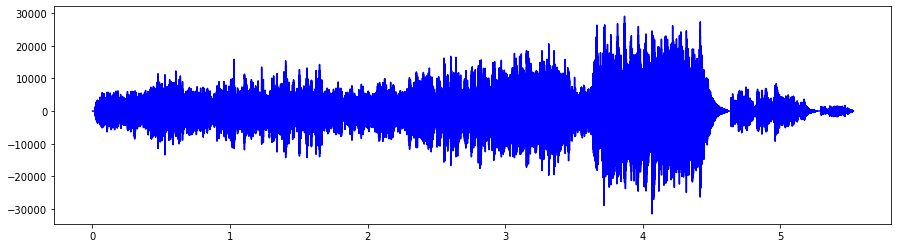

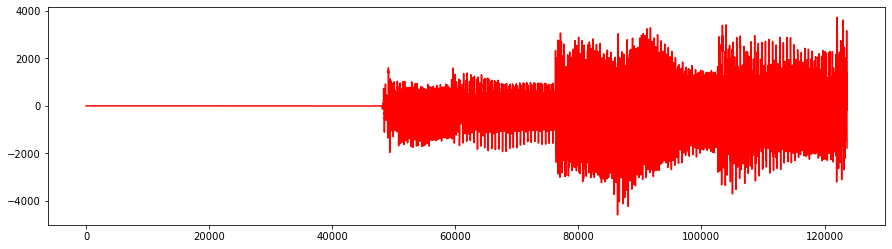

331.87120833333336


In [4]:
#sound = AudioSegment.from_mp3("Music/%s.mp3"%name)
sound = AudioSegment.from_mp3("Music/c418-aria-math.mp3")
rawdata=np.array(sound.get_array_of_samples())
print(rawdata.shape)
print(sound.frame_rate,sound.channels)

#separate the channels
rawdata = rawdata.reshape((-1, 2))
#get time in seconds
xvals=np.arange(rawdata.shape[0])/sound.frame_rate/60

plt.plot(xvals,rawdata[:,1],'r')
plt.show()
plt.plot(xvals,rawdata[:,0],'b')
plt.show()

plt.plot(rawdata[:int((onset*1.1)*44100) ,1],'r')
plt.show()

print(rawdata.shape[0]/sound.frame_rate)

In [5]:
sound = AudioSegment.from_file("record.m4a")
rawdata=np.array(sound.get_array_of_samples())
print(rawdata.shape)
print(sound.frame_rate,sound.channels)

(77129728,)
44100 1


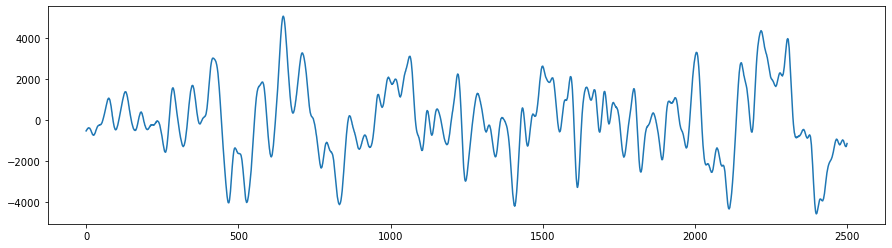

In [6]:
plt.plot(rawdata[207500 :210000])

In [7]:
a = np.stack([rawdata[207500:]]*2,axis=0)
np.save('traindata2',a)

In [8]:
from IPython.display import Audio
wave_audio = np.sin(np.linspace(0, 3000, 20000))
Audio(rawdata[207000 :210000], rate=14100)

# Taking a look at testdata

(29271040,)
44100 2


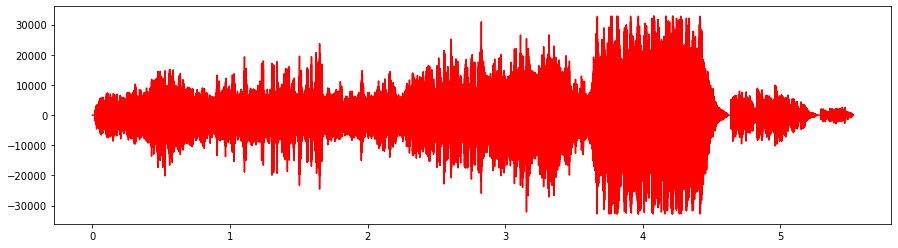

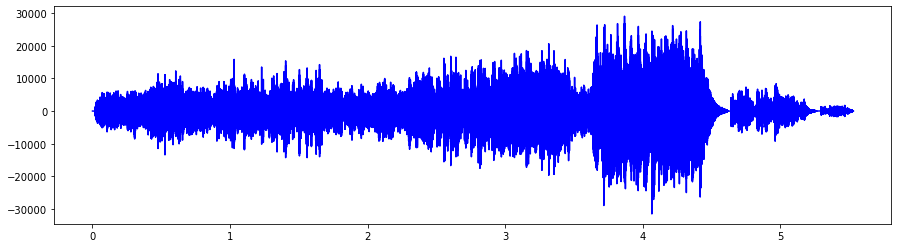

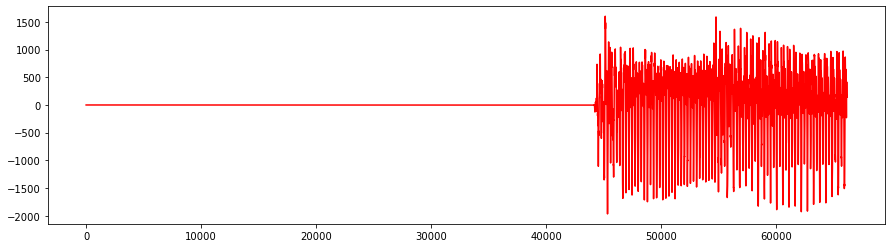

331.87120181405896


In [7]:

sound = AudioSegment.from_mp3("Music/c418-aria-math.mp3")
sound = sound.set_frame_rate(44100)
rawdata=np.array(sound.get_array_of_samples())

print(rawdata.shape)
print(sound.frame_rate,sound.channels)

#separate the channels
rawdata = rawdata.reshape((-1, 2))
#get time in seconds
xvals=np.arange(rawdata.shape[0])/sound.frame_rate/60

plt.plot(xvals,rawdata[:,1],'r')
plt.show()
plt.plot(xvals,rawdata[:,0],'b')
plt.show()

plt.plot(rawdata[:int((1.5)*44100) ,1],'r')
plt.show()

print(rawdata.shape[0]/sound.frame_rate)

np.save('ariamath',rawdata.transpose(1,0))

In [8]:
def heuristic_onset(arr,thresh=200,frame_rate=44100):
    for idx in range(len(arr)):
        if abs(arr[idx])>thresh:
            return idx/frame_rate
        
print(heuristic_onset(rawdata[:,0]),heuristic_onset(rawdata[:,1]))

1.0066666666666666 1.0067120181405895


In [9]:
np.gcd(44100,960)

60

# Looking at raw midi labels

In [9]:
mid = mido.MidiFile('Music/%s.mid'%name, clip=True)
print(mid.tracks[0])
for m in mid.tracks[1][:10]:
    print(m)

t=0

for m in mid.tracks[1]:
    t+=m.time
print(t,mid.length,t/mid.length)

MidiTrack([
  MetaMessage('track_name', name='Cut_\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', time=0),
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)])
MetaMessage('track_name', name='MIDI 01', time=0)
control_change channel=0 control=67 value=8 time=918
control_change channel=0 control=67 value=0 time=250
note_on channel=0 note=68 velocity=35 time=1270
note_on channel=0 note=49 velocity=11 time=10
note_on channel=0 note=66 velocity=44 time=239
note_off channel=0 note=68 velocity=34 time=208
note_on channel=0 note=64 velocity=48 time=35
note_off channel=0 note=64 velocity=53 time=241
note_on channel=0 note=63 velocity=48 time=14
150274 156.53541666666368 960.0000000000183


In [10]:
mid = mido.MidiFile('HPI_6005.mid', clip=True)

for m in mid.tracks[0][:20]:
    print(m)

t=0

for m in mid.tracks[0]:
    t+=m.time
print(t,mid.length,t/mid.length)

MetaMessage('track_name', name='New Song', time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('set_tempo', tempo=434760, time=0)
sysex data=(65,16,66,18,64,0,127,0,65) time=0
sysex data=(65,16,66,18,64,26,20,0,18) time=60
sysex data=(65,16,66,18,64,26,21,2,15) time=2
sysex data=(65,16,66,18,64,3,0,0,64,0,125) time=2
sysex data=(65,16,66,18,64,3,23,40,126) time=2
sysex data=(65,16,66,18,64,65,35,0,64,48,64,48,39,85) time=2
control_change channel=0 control=0 value=0 time=2
control_change channel=0 control=32 value=66 time=1
program_change channel=0 program=0 time=1
control_change channel=0 control=11 value=127 time=1
control_change channel=0 control=93 value=0 time=1
control_change channel=0 control=91 value=40 time=1
note_on channel=0 note=21 velocity=49 time=405
note_on channel=0 note=22 velocity=63 time=68
note_off channel=0 note=21 velocity=50 time=4
note_off channel=0 note=22 velocity=44 time=59
n

In [54]:
276.0143527463564/60

4.6002392124392735

# Converting to an 88xN array of on/off note values

In [11]:
def track2arr(track):
    t=-1
    #get the total time since the first note was pressed
    for m in track:
        if t>=0:
            t+=m.time
        elif m.type=='note_on':
            t=0
    print(t,t/960)
    trackarr=np.zeros([t,88],dtype=np.int8)
    
    #array where notes were stored
    notearr=np.zeros(88,dtype=np.int8)
    
    t=-1
    
    for m in track:
        if t>=0:
            t0=t
            t+=m.time
            trackarr[t0:t]=notearr.copy()
            if m.type=='note_on':
                #only notes between 21 and 188 are piano keys apparently
                if 21 <= m.note <= 108:
                    notearr[m.note-21]=1
            elif m.type=='note_off':
                if 21 <= m.note <= 108:
                    notearr[m.note-21]=0
        elif m.type=='note_on' and 21 <= m.note <= 108:
            t=0
            notearr[m.note-21]=1
    return trackarr.transpose(1,0)
labels = track2arr(mid.tracks[0])

479040 499.0


(88, 479040)


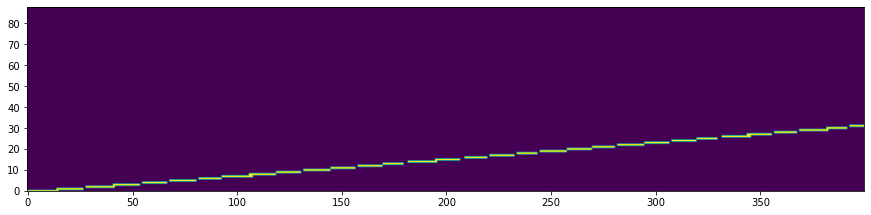

In [92]:
print(labels.shape)
plt.imshow(labels[:,:2000:5])
plt.ylim(0,88)
plt.show()

In [93]:
np.save("trainlabel2",labels)

In [58]:
msg = mido.Message('note_on', note=60,time=20)
msg.time

20

In [12]:

def arr2track(arr,ticks=1):
    arr2=np.roll(arr,1,axis=1)
    events=arr-arr2
    track = mido.MidiTrack()
    t=0
    for timestep in events.transpose(1,0):
        for idx in range(88):
            event_type=timestep[idx]
            note=idx+21
            if event_type==1:
                msg = mido.Message('note_on', note=note,time=t*ticks)
                track.append(msg)
                t=0
            if event_type==-1:
                msg = mido.Message('note_off', note=note,time=t*ticks)
                track.append(msg)
                t=0
        t+=1
    return track
    
    
outtrack=arr2track(labels)

KeyboardInterrupt: 

In [ ]:
for m in outtrack[:10]:
    print(m)
print("-------")
for m in mid.tracks[1][:10]:
    print(m)

In [24]:
aria_arr=np.load('musicB/aria4.npy')
print(aria_arr.shape)
outtrack=arr2track(aria_arr,ticks=16)

(88, 19456)


In [25]:
mid2 = mido.MidiFile('Music/%s.mid'%name, clip=True)
mid2.tracks.remove(mid2.tracks[1])
mid2.tracks.append(outtrack)
mid2.save("MusicB/tst4.mid") 

# Creating the dataset

Bach_BWV849-01_001_20090916-SMD
153.99583333333334


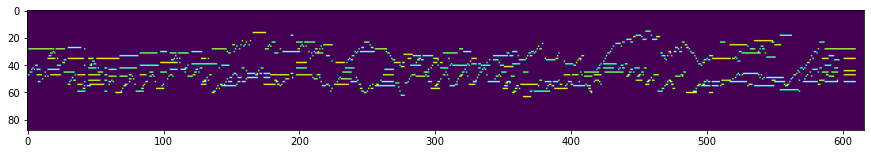

Bach_BWV849-02_001_20090916-SMD
235.578125


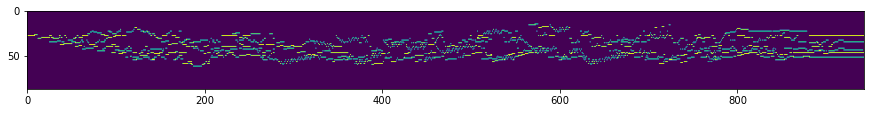

Bach_BWV871-01_002_20090916-SMD
137.26354166666667


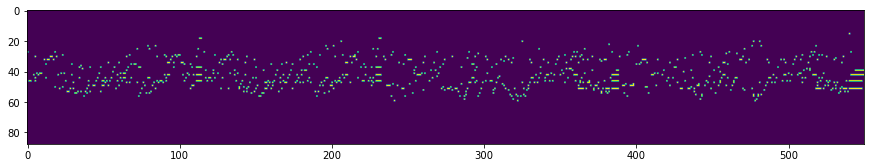

Bach_BWV871-02_002_20090916-SMD
123.98020833333334


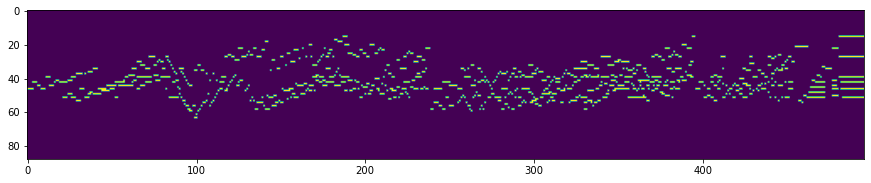

Bach_BWV875-01_002_20090916-SMD
98.96979166666667


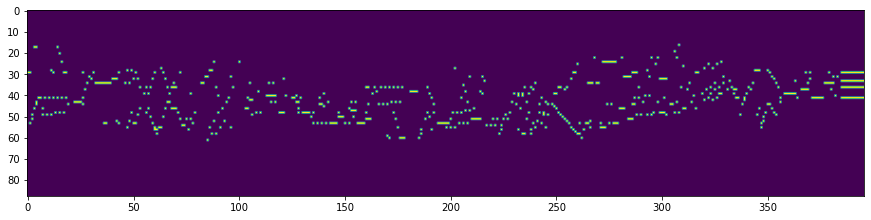

Bach_BWV875-02_002_20090916-SMD
116.26770833333333


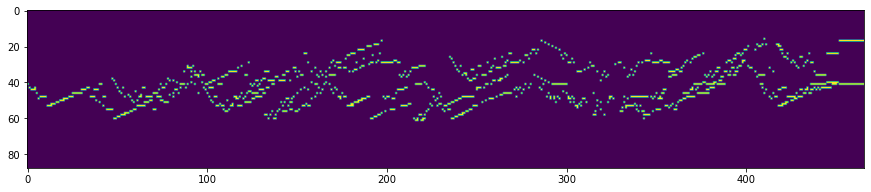

Bach_BWV888-01_008_20110315-SMD
131.62083333333334


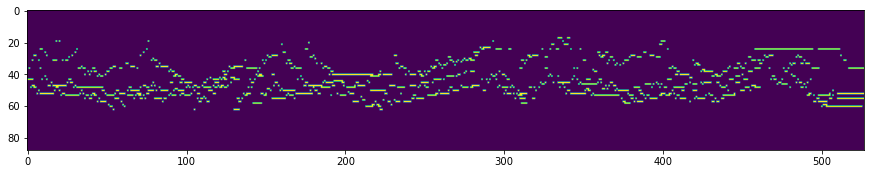

Bach_BWV888-02_008_20110315-SMD
72.23645833333333


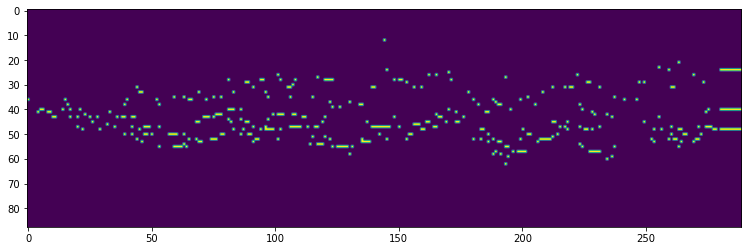

Bartok_SZ080-01_002_20110315-SMD
281.7885416666667


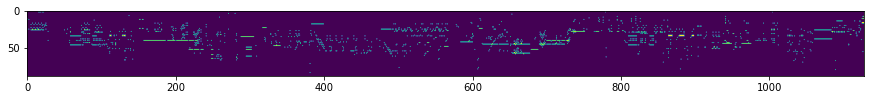

Bartok_SZ080-02_002_20110315-SMD
258.01458333333335


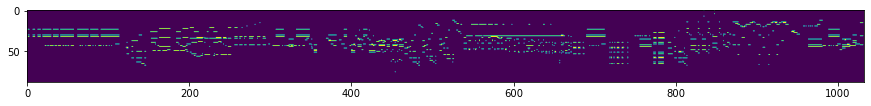

Bartok_SZ080-03_002_20110315-SMD
211.46354166666666


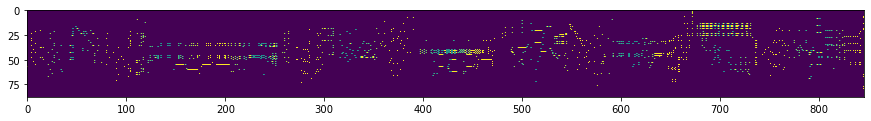

Beethoven_Op027No1-01_003_20090916-SMD
429.6958333333333


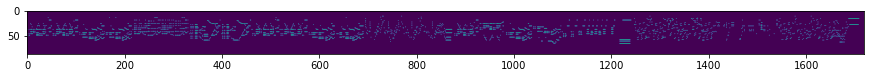

Beethoven_Op027No1-02_003_20090916-SMD
175.76145833333334


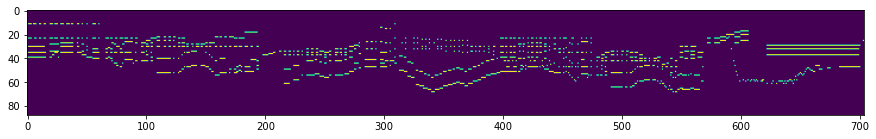

Beethoven_Op027No1-03_003_20090916-SMD
335.76666666666665


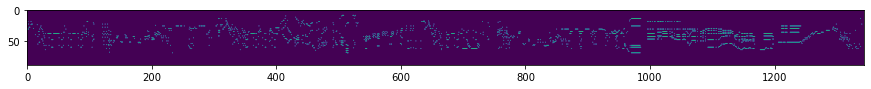

Beethoven_Op031No2-01_002_20090916-SMD
529.0916666666667


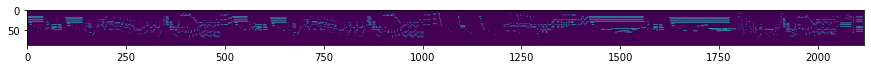

Beethoven_Op031No2-02_002_20090916-SMD
505.18958333333336


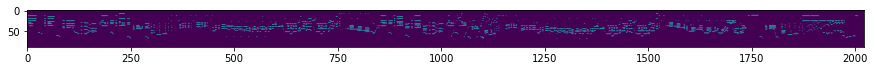

Beethoven_Op031No2-03_002_20090916-SMD
399.99791666666664


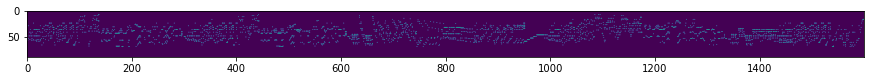

Beethoven_WoO080_001_20081107-SMD
1328.9541666666667


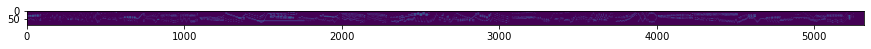

Brahms_Op005-01_002_20110315-SMD
486.54479166666664


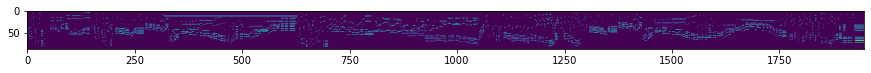

Brahms_Op010No1_003_20090916-SMD
299.45416666666665


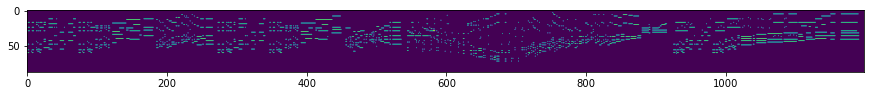

Brahms_Op010No2_003_20090916-SMD
405.48125


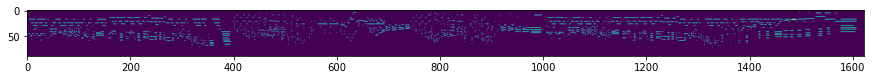

Chopin_Op010-03_007_20100611-SMD
285.45


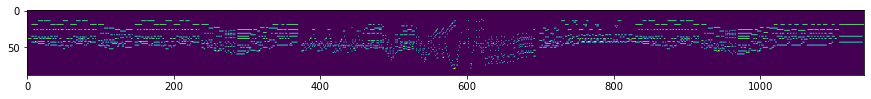

Chopin_Op010-04_007_20100611-SMD
130.79270833333334


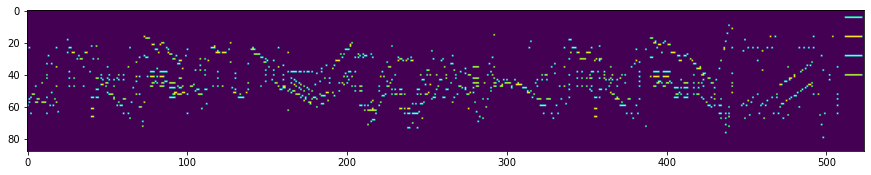

Chopin_Op026No1_003_20100611-SMD
461.20104166666664


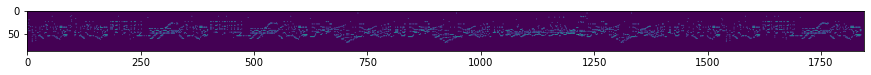

Chopin_Op026No2_005_20100611-SMD
466.0229166666667


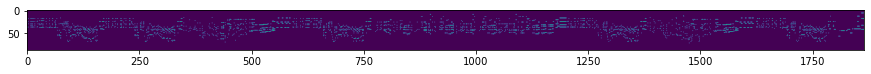

Chopin_Op028-01_003_20100611-SMD
32.37291666666667


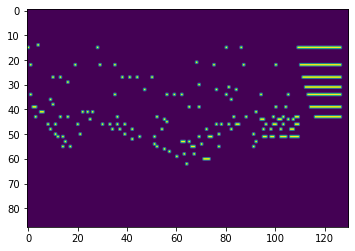

Chopin_Op028-03_003_20100611-SMD
58.572916666666664


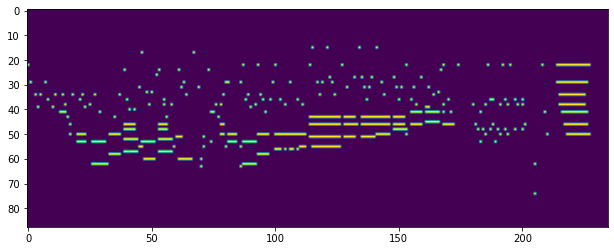

Chopin_Op028-04_003_20100611-SMD
118.36458333333333


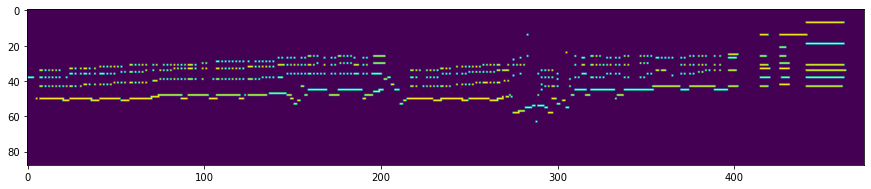

Chopin_Op028-11_003_20100611-SMD
37.41354166666667


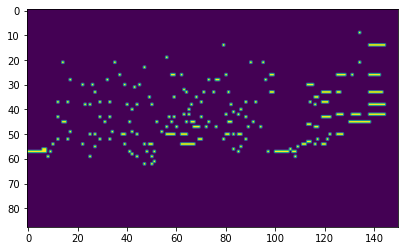

Chopin_Op028-15_006_20100611-SMD
317.75104166666665


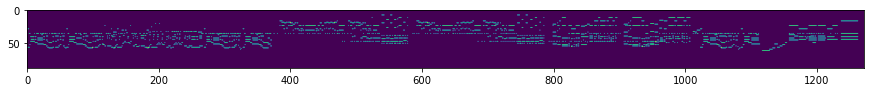

Chopin_Op028-17_005_20100611-SMD
175.87083333333334


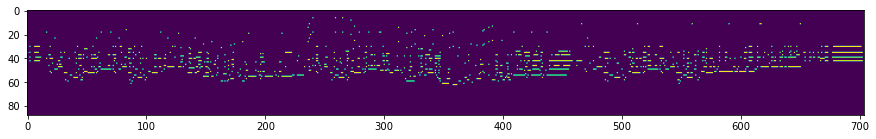

Chopin_Op029_004_20100611-SMD
242.56145833333332


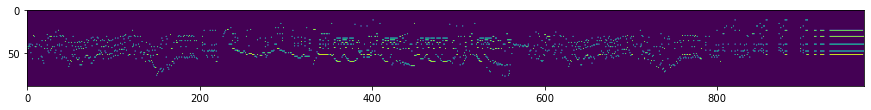

Chopin_Op048No1_007_20100611-SMD
431.20729166666666


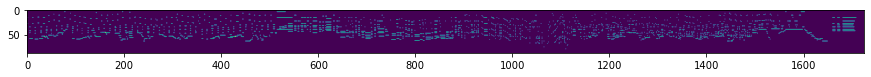

Chopin_Op066_006_20100611-SMD
309.878125


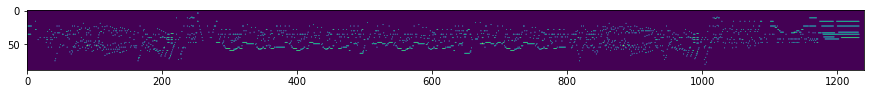

Haydn_Hob017No4_003_20090916-SMD
348.23333333333335


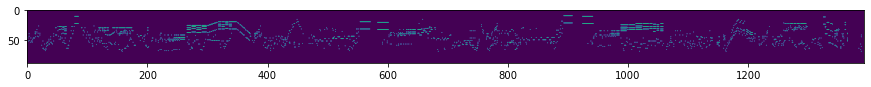

Haydn_HobXVINo52-01_008_20110315-SMD
483.18125


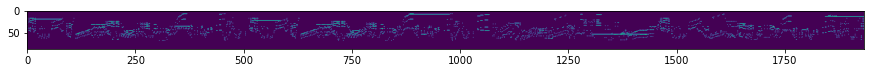

Haydn_HobXVINo52-02_008_20110315-SMD
433.15833333333336


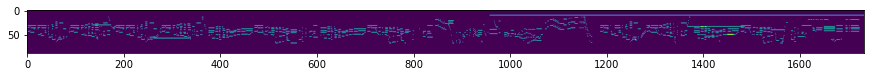

Haydn_HobXVINo52-03_008_20110315-SMD
344.62395833333335


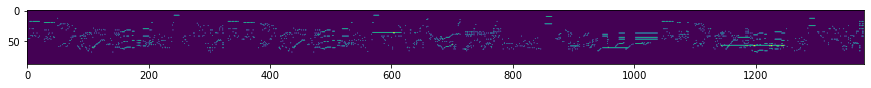

Liszt_AnnesDePelerinage-LectureDante_002_20090916-SMD
1033.81875


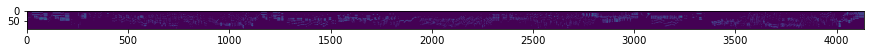

Liszt_KonzertetuedeNo2LaLeggierezza_003_20090916-SMD
296.8364583333333


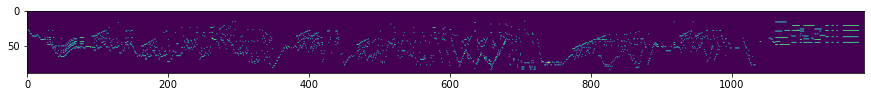

Liszt_VariationenBachmotivWeinenKlagenSorgenZagen_001_20090916-SMD
962.0114583333333


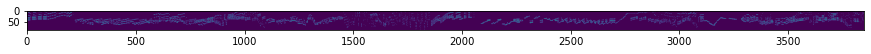

Mozart_KV265_006_20110315-SMD
476.15520833333335


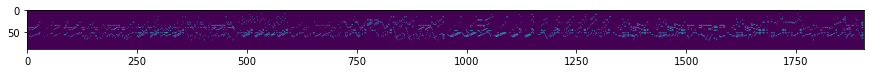

Mozart_KV398_002_20110315-SMD
439.978125


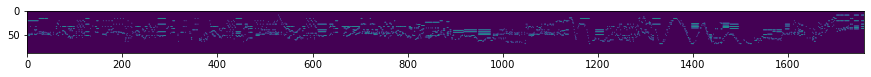

Rachmaninoff_Op036-01_007_20110315-SMD
561.3291666666667


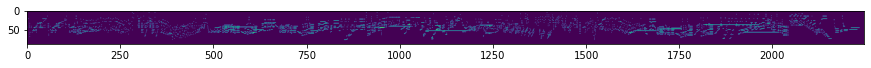

Rachmaninoff_Op036-02_007_20110315-SMD
429.478125


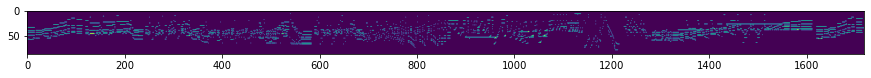

Rachmaninoff_Op036-03_007_20110315-SMD
336.31666666666666


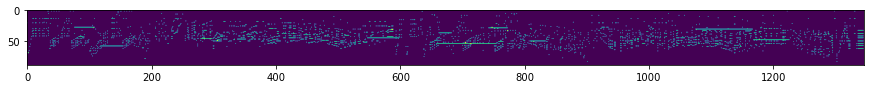

Rachmaninov_Op039No1_002_20090916-SMD
187.14583333333334


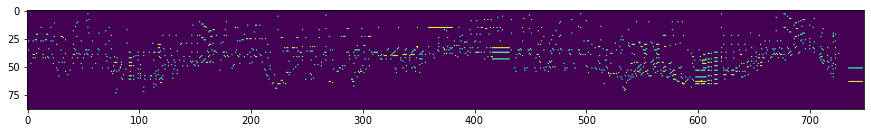

Ravel_JeuxDEau_008_20110315-SMD
316.0229166666667


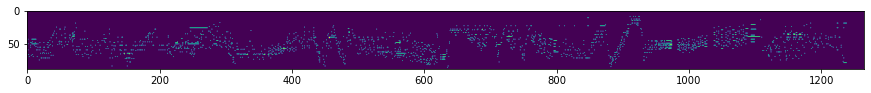

Ravel_ValsesNoblesEtSentimentales_003_20090916-SMD
916.834375


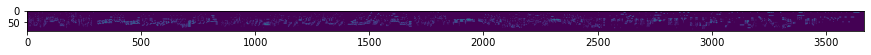

Skryabin_Op008No8_003_20090916-SMD
205.03958333333333


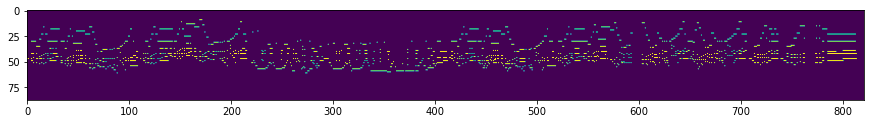

In [38]:
labels=[]
for i in range(50):
    with open('music/onsets.txt') as onsets:
        for x in range(i+1):
            line=onsets.readline()
    onset=float(line.split()[-1])
    #print(onset)
    name=line.split()[1]
    print(name)
    
    mid = mido.MidiFile('Music/%s.mid'%name, clip=True)
    miditrack=track2arr(mid.tracks[1])
    labels.append(miditrack)
    plt.imshow(miditrack[:,::960//4])
    plt.show()
np.savez("Music/Labels",*labels)

# Checking out the onsets & Making traindata

Bach_BWV849-01_001_20090916-SMD
(13847400,)
44100 2


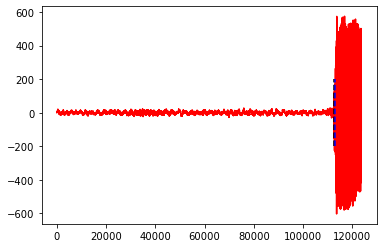

(6811290, 2)
2.5571655328798184 2.5571655328798184 2.549
Bach_BWV849-02_001_20090916-SMD
(21070098,)
44100 2


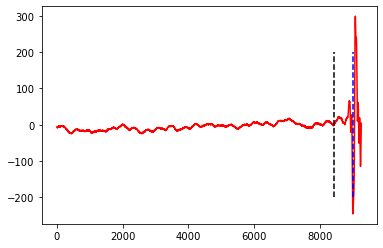

(10526626, 2)
0.20405895691609977 0.20405895691609977 0.191
Bach_BWV871-01_002_20090916-SMD
(12348000,)
44100 2


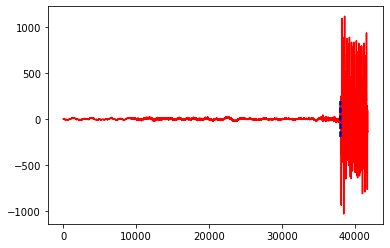

(6136030, 2)
0.863718820861678 0.863718820861678 0.861
Bach_BWV871-02_002_20090916-SMD
(11201400,)
44100 2


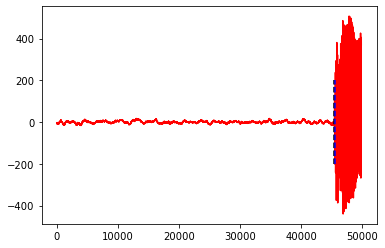

(5555410, 2)
1.0317460317460319 1.0317460317460319 1.027
Bach_BWV875-01_002_20090916-SMD
(8996400,)
44100 2


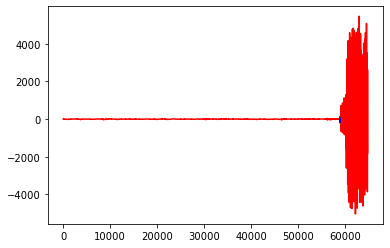

(4439283, 2)
1.3382993197278912 1.3382993197278912 1.336
Bach_BWV875-02_002_20090916-SMD
(10495800,)
44100 2


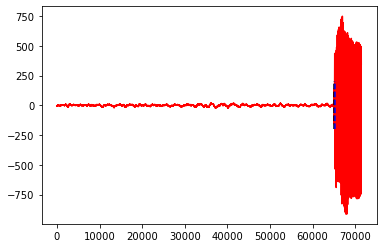

(5182985, 2)
1.4775736961451247 1.4775736961451247 1.472
Bach_BWV888-01_008_20110315-SMD
(11870838,)
44100 2


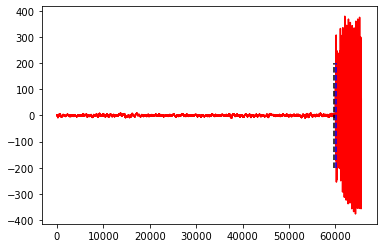

(5875796, 2)
1.3634467120181406 1.3641950113378685 1.352
Bach_BWV888-02_008_20110315-SMD
(6694380,)
44100 2


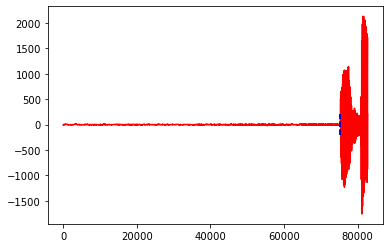

(3271956, 2)
1.708185941043084 1.7091609977324262 1.706
Bartok_SZ080-01_002_20110315-SMD
(25121124,)
44100 2


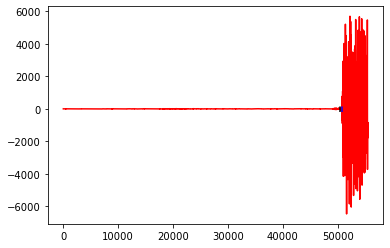

(12510156, 2)
1.1501814058956916 1.1506575963718821 1.143
Bartok_SZ080-02_002_20110315-SMD
(23051952,)
44100 2


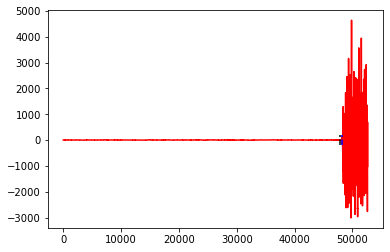

(11478128, 2)
1.0933786848072562 1.0954648526077098 1.085
Bartok_SZ080-03_002_20110315-SMD
(18892440,)
44100 2


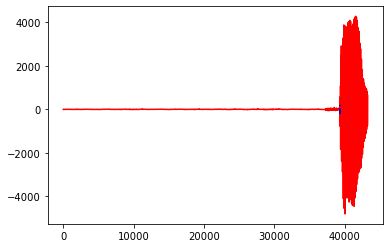

(9406883, 2)
0.8925170068027211 0.8921315192743764 0.892
Beethoven_Op027No1-01_003_20090916-SMD
(38014200,)
44100 2


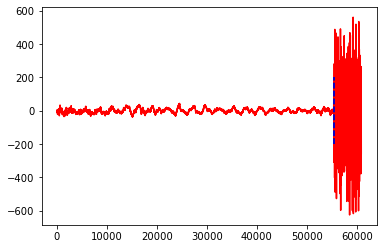

(18951755, 2)
1.2564625850340136 1.2564625850340136 1.255
Beethoven_Op027No1-02_003_20090916-SMD
(15523200,)
44100 2


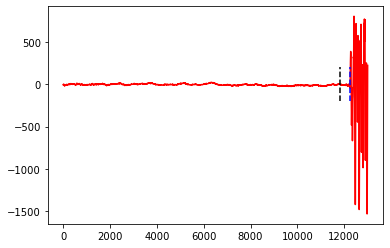

(7749782, 2)
0.2780498866213152 0.2780498866213152 0.268
Beethoven_Op027No1-03_003_20090916-SMD
(29899800,)
44100 2


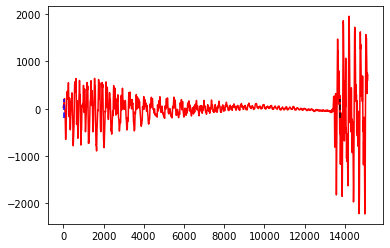

(14936141, 2)
0.0012244897959183673 0.0012244897959183673 0.312
Beethoven_Op031No2-01_002_20090916-SMD
(46746000,)
44100 2


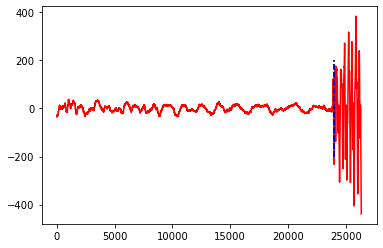

(23349054, 2)
0.5437868480725624 0.5437868480725624 0.543
Beethoven_Op031No2-02_002_20090916-SMD
(44722692,)
44100 2


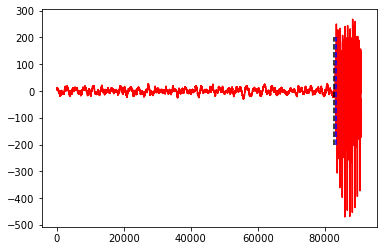

(22278659, 2)
1.8931972789115645 1.8931972789115645 1.875
Beethoven_Op031No2-03_002_20090916-SMD
(35456400,)
44100 2


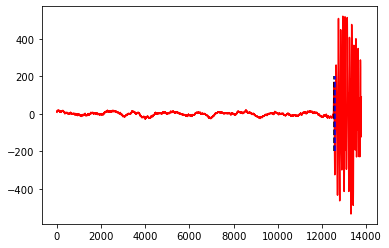

(17715676, 2)
0.28494331065759637 0.28494331065759637 0.284
Beethoven_WoO080_001_20081107-SMD
(58145032,)
44100 2


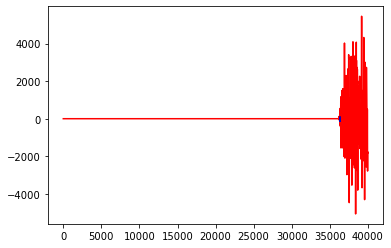

(29036178, 2)
0.8239002267573696 0.8244671201814059 0.824
Brahms_Op005-01_002_20110315-SMD
(43156260,)
44100 2


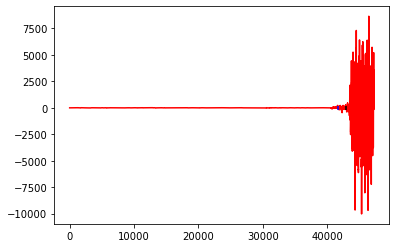

(21535133, 2)
0.948843537414966 0.9440816326530612 0.975
Brahms_Op010No1_003_20090916-SMD
(26636400,)
44100 2


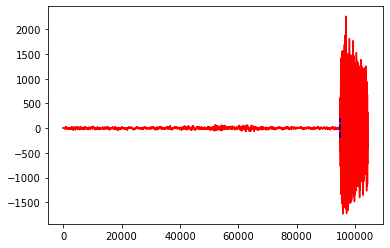

(13223385, 2)
2.151337868480726 2.151337868480726 2.15
Brahms_Op010No2_003_20090916-SMD
(36162000,)
44100 2


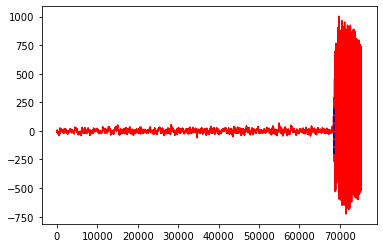

(18012557, 2)
1.5543537414965987 1.5543537414965987 1.552
Chopin_Op010-03_007_20100611-SMD
(25313400,)
44100 2


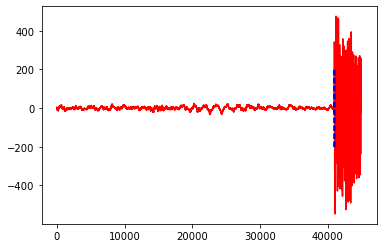

(12615820, 2)
0.9314965986394558 0.9292517006802721 0.927
Chopin_Op010-04_007_20100611-SMD
(11642400,)
44100 2


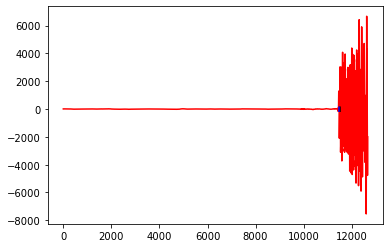

(5809690, 2)
0.26065759637188207 0.2595918367346939 0.261
Chopin_Op026No1_003_20100611-SMD
(40748400,)
44100 2


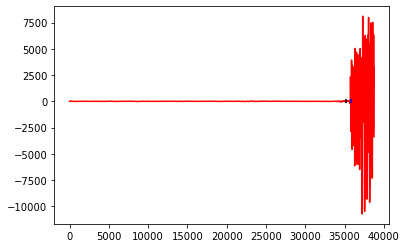

(20338965, 2)
0.8113378684807256 0.8106575963718821 0.799
Chopin_Op026No2_005_20100611-SMD
(41277600,)
44100 2


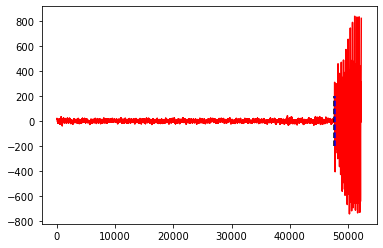

(20591305, 2)
1.084625850340136 1.080702947845805 1.077
Chopin_Op028-01_003_20100611-SMD
(2910600,)
44100 2


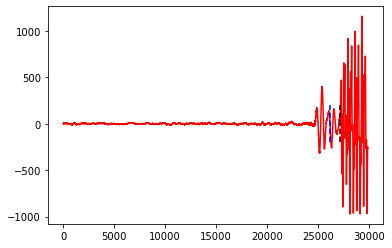

(1428135, 2)
0.617482993197279 0.5688208616780045 0.616
Chopin_Op028-03_003_20100611-SMD
(5203800,)
44100 2


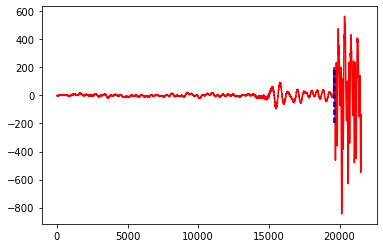

(2582320, 2)
0.4466439909297052 0.4463265306122449 0.444
Chopin_Op028-04_003_20100611-SMD
(10495800,)
44100 2


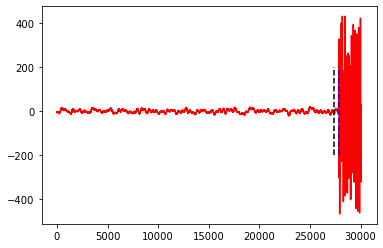

(5220558, 2)
0.6343083900226757 0.6313378684807256 0.62
Chopin_Op028-11_003_20100611-SMD
(3351600,)
44100 2


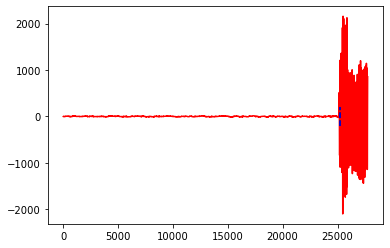

(1650575, 2)
0.5717687074829932 0.570204081632653 0.572
Chopin_Op028-15_006_20100611-SMD
(28135800,)
44100 2


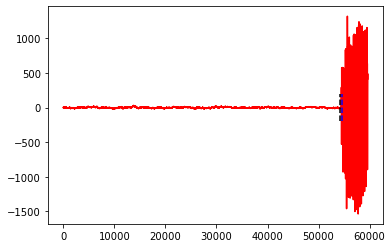

(14013702, 2)
1.2392290249433107 1.235079365079365 1.229
Chopin_Op028-17_005_20100611-SMD
(15611400,)
44100 2


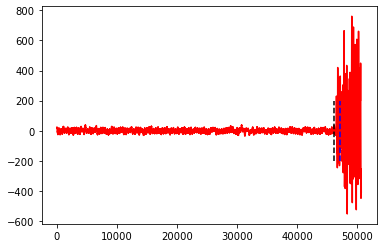

(7759616, 2)
1.0844671201814058 1.0553968253968253 1.045
Chopin_Op029_004_20100611-SMD
(21432600,)
44100 2


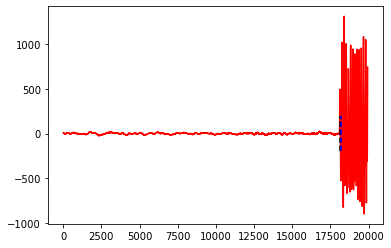

(10698175, 2)
0.413015873015873 0.4104988662131519 0.411
Chopin_Op048No1_007_20100611-SMD
(38102400,)
44100 2


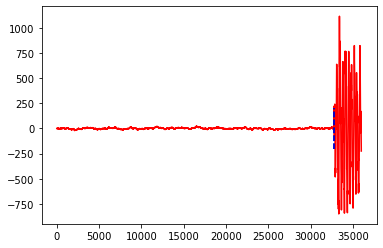

(19018478, 2)
0.7434240362811791 0.7434240362811791 0.742
Chopin_Op066_006_20100611-SMD
(27430200,)
44100 2


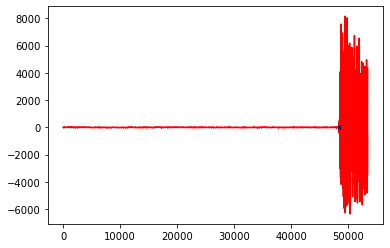

(13666502, 2)
1.0992743764172335 1.0992290249433108 1.102
Haydn_Hob017No4_003_20090916-SMD
(30958200,)
44100 2


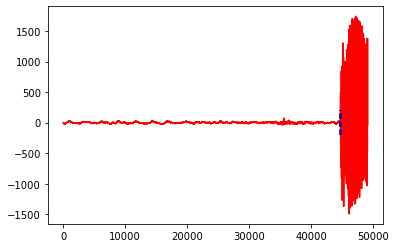

(15434427, 2)
1.0148526077097506 1.0148526077097506 1.013
Haydn_HobXVINo52-01_008_20110315-SMD
(42822864,)
44100 2


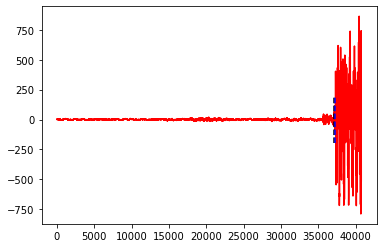

(21374388, 2)
0.8448299319727891 0.8456462585034014 0.84
Haydn_HobXVINo52-02_008_20110315-SMD
(38272626,)
44100 2


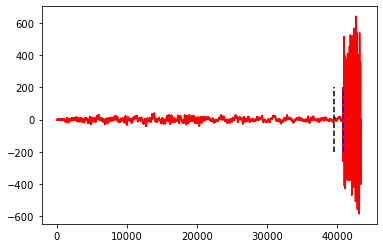

(19096800, 2)
0.9272789115646258 0.9268707482993197 0.896
Haydn_HobXVINo52-03_008_20110315-SMD
(30638034,)
44100 2


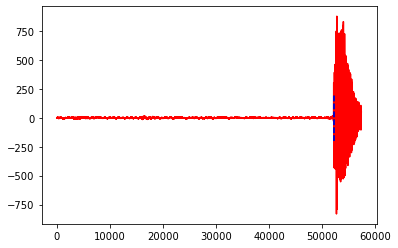

(15266891, 2)
1.1818367346938776 1.1821315192743764 1.182
Liszt_AnnesDePelerinage-LectureDante_002_20090916-SMD
(91656558,)
44100 2


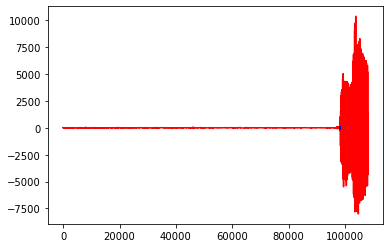

(45730069, 2)
2.2298866213151927 2.2298866213151927 2.227
Liszt_KonzertetuedeNo2LaLeggierezza_003_20090916-SMD
(26460000,)
44100 2


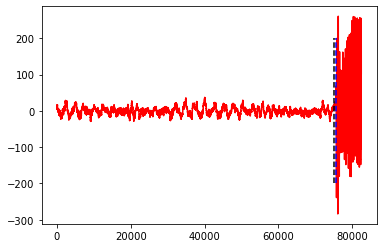

(13155030, 2)
1.7175283446712017 1.7175283446712017 1.7
Liszt_VariationenBachmotivWeinenKlagenSorgenZagen_001_20090916-SMD
(85201200,)
44100 2


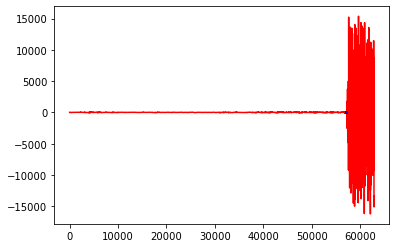

(42543447, 2)
1.29734693877551 1.29734693877551 1.296
Mozart_KV265_006_20110315-SMD
(42249564,)
44100 2


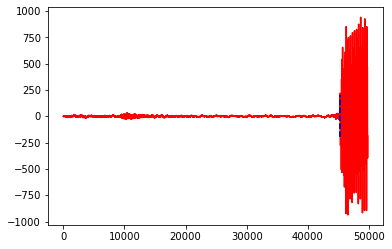

(21079536, 2)
1.027845804988662 1.0268707482993198 1.026
Mozart_KV398_002_20110315-SMD
(39026220,)
44100 2


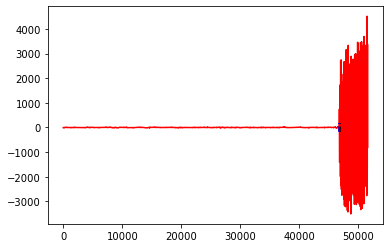

(19466232, 2)
1.060498866213152 1.0604081632653062 1.063
Rachmaninoff_Op036-01_007_20110315-SMD
(49599270,)
44100 2


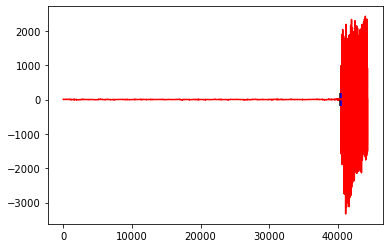

(24759328, 2)
0.916485260770975 0.9168707482993197 0.914
Rachmaninoff_Op036-02_007_20110315-SMD
(38044188,)
44100 2


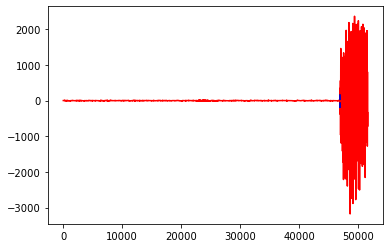

(18975172, 2)
1.064625850340136 1.0642857142857143 1.064
Rachmaninoff_Op036-03_007_20110315-SMD
(29942136,)
44100 2


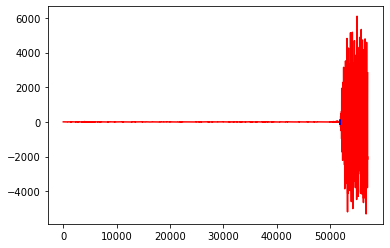

(14919207, 2)
1.1775510204081632 1.1784353741496598 1.176
Rachmaninov_Op039No1_002_20090916-SMD
(17348940,)
44100 2


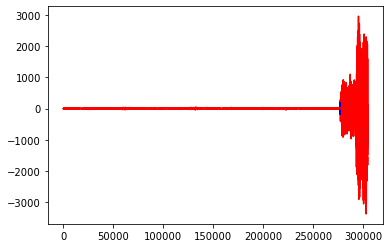

(8397743, 2)
6.2791836734693875 6.2791836734693875 6.275
Ravel_JeuxDEau_008_20110315-SMD
(27941760,)
44100 2


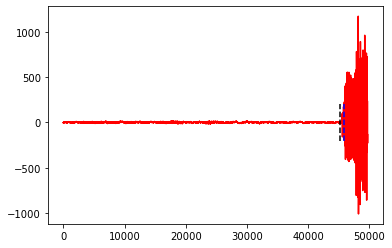

(13925678, 2)
1.0364399092970522 1.0400226757369615 1.025
Ravel_ValsesNoblesEtSentimentales_003_20090916-SMD
(81055800,)
44100 2


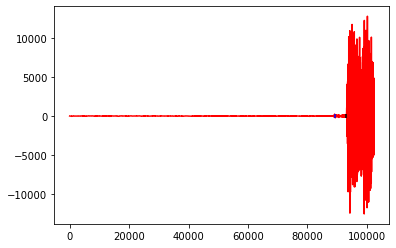

(40434805, 2)
2.0204761904761903 2.0204761904761903 2.111
Skryabin_Op008No8_003_20090916-SMD
(18169200,)
44100 2


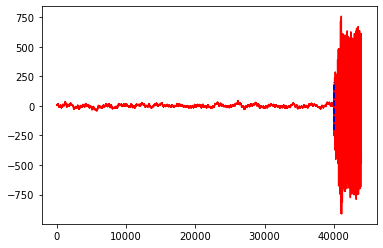

(9044646, 2)
0.9075510204081633 0.9075510204081633 0.906


In [18]:
traindata=[]

for i in range(50):
    with open('music/onsets.txt') as onsets:
        for x in range(i+1):
            line=onsets.readline()
    onset=float(line.split()[-1])
    #print(onset)
    name=line.split()[1]
    print(name)

    sound = AudioSegment.from_mp3("Music/%s.mp3"%name)
    #sound = AudioSegment.from_mp3("Music/c418-aria-math.mp3")
    rawdata=np.array(sound.get_array_of_samples())
    print(rawdata.shape)
    print(sound.frame_rate,sound.channels)

    #separate the channels
    rawdata = rawdata.reshape((-1, 2))
    
    plt.plot(rawdata[:int((onset*1.1)*44100) ,1],'r')
    onidx=int((onset*1)*44100)
    
    
    heuron=(heuristic_onset(rawdata[:,0])+heuristic_onset(rawdata[:,1]))/2
    
    heuridx=int((heuron*1)*44100)
    
    plt.plot([onidx,onidx],[-200,200],'k--')
    plt.plot([heuridx,heuridx],[-200,200],'b--')
    plt.show()
    
    traindata.append(rawdata[onidx:,:].transpose(1,0))
    print(rawdata[onidx:,:].shape)
    print(heuristic_onset(rawdata[:,0]),heuristic_onset(rawdata[:,1]),onset)
    
np.savez("Music/data",*traindata)

In [2]:
import torch

In [3]:
Loss=torch.nn.BCELoss()

In [8]:
N=100
pred=torch.ones(N)*0.5
real=torch.ones(N)
real[:N//2]=0
Loss(pred,real)

tensor(0.6931)